# 4.Run the same code without scaling the images, how the accuracy changes?

In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
/Users/lavanya/opt/anaconda3/envs/env_full/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lavanya/opt/anaconda3/envs/env_full/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lavanya/opt/anaconda3/envs/env_full/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])

(28, 28)


In [3]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [4]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [5]:
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
#creating network
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid')) # extra hidden layer
model.add(Dense(512, activation='sigmoid')) # extra hidden layer
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.6972 - accuracy: 0.7697 - val_loss: 0.3191 - val_accuracy: 0.9040
Epoch 2/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2666 - accuracy: 0.9177 - val_loss: 0.2049 - val_accuracy: 0.9377
Epoch 3/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.2036 - accuracy: 0.9373 - val_loss: 0.1870 - val_accuracy: 0.9412
Epoch 4/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1711 - accuracy: 0.9477 - val_loss: 0.2078 - val_accuracy: 0.9359
Epoch 5/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.1492 - accuracy: 0.9550 - val_loss: 0.2161 - val_accuracy: 0.9358
Epoch 6/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1367 - accuracy: 0.9579 - val_loss: 0.1419 - val_accuracy: 0.9555
Epoch 7/10
60000/60000 [==============================] - 7s 

In [8]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [9]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

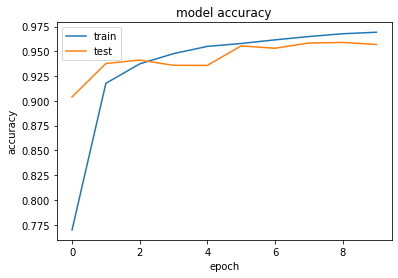

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

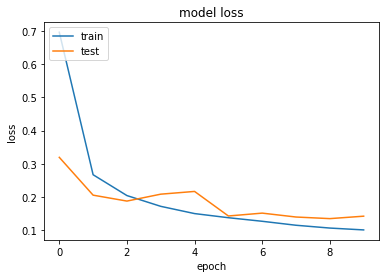

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()